In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from matplotlib import pyplot as plt
import datetime
import seaborn as sns


In [2]:
#Train dataset
past_sales= pd.read_csv('train.csv', low_memory=False)
past_sales['Date'] = pd.to_datetime(past_sales['Date'], format='%d-%m-%Y')
past_sales['HolidayFlag'] = past_sales['HolidayFlag'].replace({0:'0'})
past_sales['month'] = past_sales['Date'].dt.strftime('%b')
print(past_sales.shape)
past_sales.head()

(949194, 9)


,StoreID,DOW,Date,Sales,StoreOpen,PromoFlag,HolidayFlag,SchUnivClose,month
0,1,7,2015-05-31,0,0,0,0,0,May
1,2,7,2015-05-31,0,0,0,0,0,May
2,3,7,2015-05-31,0,0,0,0,0,May
3,4,7,2015-05-31,0,0,0,0,0,May
4,5,7,2015-05-31,0,0,0,0,0,May


In [3]:
num_cols = ['Sales']
past_sales[num_cols].describe()

,Sales
count,949194.000000
mean,5745.395182
std,3851.817831
min,0.000000
25%,3691.000000
50%,5720.000000
75%,7830.000000
max,38722.000000


In [4]:
cat_cols = ['StoreID', 'DOW', 'PromoFlag', 'HolidayFlag', 'SchUnivClose', 'StoreOpen']
past_sales[cat_cols].astype(object).describe(include=object)

,StoreID,DOW,PromoFlag,HolidayFlag,SchUnivClose,StoreOpen
count,949194,949194,949194,949194,949194,949194
unique,1115,7,2,4,2,2
top,1,4,0,0,0,1
freq,881,135810,588989,918910,782087,785781


In [5]:
past_sales['HolidayFlag'].unique()

array(['0', 'h1', 'h2', 'h3'], dtype=object)

In [6]:
date_cols = ['Date']
past_sales[date_cols].describe()

<ipython-input-6-9f73c4c64756>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  past_sales[date_cols].describe()


,Date
count,949194
unique,881
top,2015-01-30 00:00:00
freq,1115
first,2013-01-01 00:00:00
last,2015-05-31 00:00:00


In [7]:
past_sales.isna().sum()

StoreID         0
DOW             0
Date            0
Sales           0
StoreOpen       0
PromoFlag       0
HolidayFlag     0
SchUnivClose    0
month           0
dtype: int64

In [8]:
1115 * 881, past_sales.shape[0], 1115 * 881 - past_sales.shape[0]

(982315, 949194, 33121)

In [9]:
past_sales['StoreOpen'].value_counts()

1    785781
0    163413
Name: StoreOpen, dtype: int64

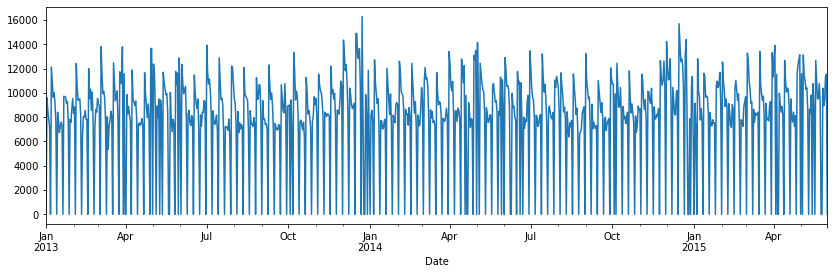

In [10]:
sample = past_sales[past_sales['StoreID'] == 233]
sample.set_index('Date')['Sales'].plot.line(figsize=(14,4));

In [11]:
past_sales[past_sales['StoreOpen'] == 0]['Sales'].min()

0

In [12]:
past_sales[past_sales['StoreOpen'] == 1]['Sales'].min()

0

<AxesSubplot:ylabel='Frequency'>

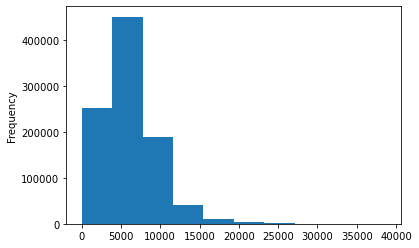

In [13]:
past_sales['Sales'].plot.hist()

In [14]:
past_sales['Sales'].skew()

0.6451527011695629

<AxesSubplot:xlabel='StoreID'>

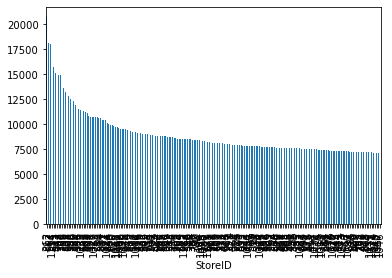

In [15]:
past_sales.groupby('StoreID')['Sales'].mean().sort_values(ascending=False).head(200).plot.bar()

In [16]:
past_sales.groupby('StoreID')['Sales'].mean().quantile([0,0.25,0.5,0.75,1])

0.00     2237.477866
0.25     4381.520974
0.50     5432.586833
0.75     6589.870034
1.00    20695.578888
Name: Sales, dtype: float64

<AxesSubplot:xlabel='month'>

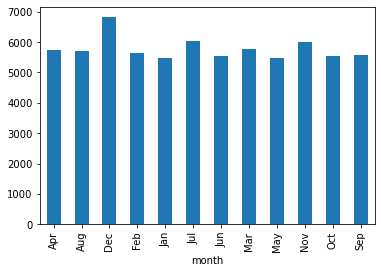

In [17]:
past_sales.groupby('month')['Sales'].mean().plot.bar()

<AxesSubplot:xlabel='PromoFlag'>

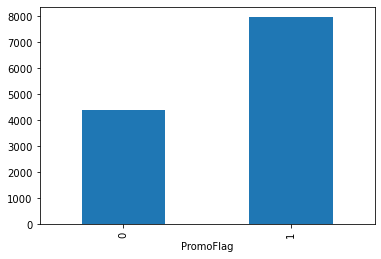

In [18]:
past_sales.groupby('PromoFlag')['Sales'].mean().plot.bar()

<AxesSubplot:xlabel='StoreOpen'>

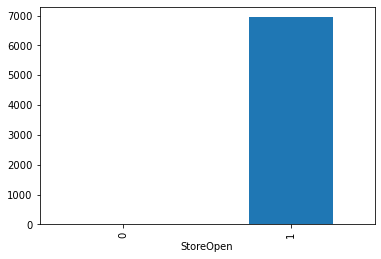

In [19]:
past_sales.groupby('StoreOpen')['Sales'].mean().plot.bar()

<AxesSubplot:xlabel='HolidayFlag'>

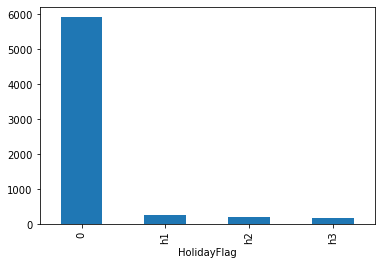

In [20]:
past_sales.groupby('HolidayFlag')['Sales'].mean().plot.bar()

<AxesSubplot:xlabel='SchUnivClose'>

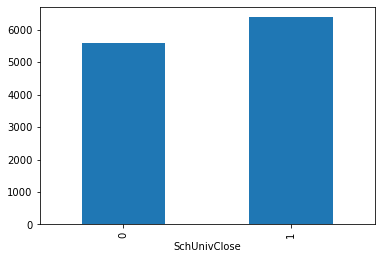

In [21]:
past_sales.groupby('SchUnivClose')['Sales'].mean().plot.bar()

In [22]:
#Store dataset
store = pd.read_csv('store.csv', low_memory=False)
print(store.shape)
store.head()

(1115, 9)


,StoreID,LocalityType,ProductMix,PromoCont,PromoContStartWeek,PromoContStartYear,CompetitionDistance,CompetitionMonth,CompetitionYear
0,1,type3,Essentials,0,NaN,NaN,1270.0,9.0,2008.0
1,2,type1,Essentials,1,13.0,2010.0,570.0,11.0,2007.0
2,3,type1,Essentials,1,14.0,2011.0,14130.0,12.0,2006.0
3,4,type3,LargeVariety,0,NaN,NaN,620.0,9.0,2009.0
4,5,type1,Essentials,0,NaN,NaN,29910.0,4.0,2015.0


In [23]:
store.isna().sum() / store.shape[0] * 100

StoreID                 0.000000
LocalityType            0.000000
ProductMix              0.000000
PromoCont               0.000000
PromoContStartWeek     48.789238
PromoContStartYear     48.789238
CompetitionDistance     0.269058
CompetitionMonth       31.748879
CompetitionYear        31.748879
dtype: float64

In [24]:
drop_cols = ['CompetitionMonth', 'CompetitionYear',
             'PromoContStartWeek', 'PromoContStartYear']

store['CompetitionDistance'] = store['CompetitionDistance'].fillna(0)


In [25]:
past_sales_merged = pd.merge(left=past_sales, right=store.drop(drop_cols ,axis=1) , on='StoreID', how='left')
past_sales.shape, past_sales_merged.shape
past_sales_merged.head()

,StoreID,DOW,Date,Sales,StoreOpen,PromoFlag,HolidayFlag,SchUnivClose,month,LocalityType,ProductMix,PromoCont,CompetitionDistance
0,1,7,2015-05-31,0,0,0,0,0,May,type3,Essentials,0,1270.0
1,2,7,2015-05-31,0,0,0,0,0,May,type1,Essentials,1,570.0
2,3,7,2015-05-31,0,0,0,0,0,May,type1,Essentials,1,14130.0
3,4,7,2015-05-31,0,0,0,0,0,May,type3,LargeVariety,0,620.0
4,5,7,2015-05-31,0,0,0,0,0,May,type1,Essentials,0,29910.0


In [26]:
past_sales_merged[past_sales_merged.StoreOpen == 1]

,StoreID,DOW,Date,Sales,StoreOpen,PromoFlag,HolidayFlag,SchUnivClose,month,LocalityType,ProductMix,PromoCont,CompetitionDistance
84,85,7,2015-05-31,12040,1,0,0,0,May,type2,Essentials,0,1870.0
121,122,7,2015-05-31,2737,1,0,0,0,May,type1,LargeVariety,0,58260.0
208,209,7,2015-05-31,1935,1,0,0,0,May,type1,LargeVariety,1,11680.0
258,259,7,2015-05-31,16944,1,0,0,0,May,type2,EssentialsPlus,0,210.0
261,262,7,2015-05-31,32400,1,0,0,0,May,type2,Essentials,0,1180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948761,682,2,2013-01-01,3375,1,0,h1,1,Jan,type2,Essentials,0,150.0
948812,733,2,2013-01-01,10765,1,0,h1,1,Jan,type2,EssentialsPlus,0,860.0
948848,769,2,2013-01-01,5035,1,0,h1,1,Jan,type2,EssentialsPlus,1,840.0
949027,948,2,2013-01-01,4491,1,0,h1,1,Jan,type2,EssentialsPlus,0,1430.0


In [27]:
dummies= pd.get_dummies(past_sales_merged)
dummies.head()
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949194 entries, 0 to 949193
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   StoreID                    949194 non-null  int64         
 1   DOW                        949194 non-null  int64         
 2   Date                       949194 non-null  datetime64[ns]
 3   Sales                      949194 non-null  int64         
 4   StoreOpen                  949194 non-null  int64         
 5   PromoFlag                  949194 non-null  int64         
 6   SchUnivClose               949194 non-null  int64         
 7   PromoCont                  949194 non-null  int64         
 8   CompetitionDistance        949194 non-null  float64       
 9   HolidayFlag_0              949194 non-null  uint8         
 10  HolidayFlag_h1             949194 non-null  uint8         
 11  HolidayFlag_h2             949194 non-null  uint8   

In [28]:
input=dummies.drop(['StoreID', 'Date', 'Sales','HolidayFlag_h2','HolidayFlag_h3',
                    'month_Jan','month_Apr', 'month_Aug', 'month_Dec',
                    'month_Feb', 'month_Mar','month_May', 'month_Nov',
                    'month_Oct', 'month_Sep'], axis=1)


In [29]:
target=dummies['Sales']

In [30]:
input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949194 entries, 0 to 949193
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DOW                        949194 non-null  int64  
 1   StoreOpen                  949194 non-null  int64  
 2   PromoFlag                  949194 non-null  int64  
 3   SchUnivClose               949194 non-null  int64  
 4   PromoCont                  949194 non-null  int64  
 5   CompetitionDistance        949194 non-null  float64
 6   HolidayFlag_0              949194 non-null  uint8  
 7   HolidayFlag_h1             949194 non-null  uint8  
 8   month_Jul                  949194 non-null  uint8  
 9   month_Jun                  949194 non-null  uint8  
 10  LocalityType_type1         949194 non-null  uint8  
 11  LocalityType_type2         949194 non-null  uint8  
 12  LocalityType_type3         949194 non-null  uint8  
 13  LocalityType_type4         94

In [31]:
from sklearn.model_selection import train_test_split
train_x, validate_x, train_y, validate_y = train_test_split(input,
                                                            target,
                                                            test_size=0.2,
                                                            random_state=21)
train_x.shape, validate_x.shape, train_y.shape, validate_y.shape

((759355, 17), (189839, 17), (759355,), (189839,))

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_x)
train_x_scaled = scaler.transform(train_x)
validate_x_scaled = scaler.transform(validate_x)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
from sklearn.metrics import mean_squared_error
linear_model = LinearRegression().fit(train_x_scaled, train_y)
validate_y_pred = linear_model.predict(validate_x_scaled)
rmse = mean_squared_error(validate_y, validate_y_pred, squared=False)
rmse

2535.7134362986903

In [35]:
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42).fit(input, target)
validate_y_pred = rf_model.predict(validate_x)
rmse = mean_squared_error(validate_y, validate_y_pred, squared=False)
rmse

1296.1134625165134

In [36]:
rf_model = RandomForestRegressor(n_jobs=-1, random_state=40).fit(input, target)
validate_y_pred = rf_model.predict(validate_x)
rmse = mean_squared_error(validate_y, validate_y_pred, squared=False)
rmse

1296.4381799597152

In [37]:
validate_y_pred = rf_model.predict(validate_x)
rmse = mean_squared_error(validate_y, validate_y_pred, squared=False)
rmse

1296.4381799597152

In [42]:
future_sales = pd.read_csv('test_1.csv', low_memory=False)
future_sales['Date'] = pd.to_datetime(future_sales['Date'], format='%d-%m-%Y')
future_sales['HolidayFlag'] = future_sales['HolidayFlag'].replace({0:'0'})
future_sales['month'] = future_sales['Date'].dt.strftime('%b')
future_sales_merged = pd.merge(left=future_sales, right=store.drop(drop_cols, axis=1),
                             on='StoreID', how='left')

In [43]:
future_sales_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54663 entries, 0 to 54662
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   54663 non-null  int64         
 1   StoreID              54663 non-null  int64         
 2   DOW                  54663 non-null  int64         
 3   Date                 54663 non-null  datetime64[ns]
 4   StoreOpen            54663 non-null  int64         
 5   PromoFlag            54663 non-null  int64         
 6   HolidayFlag          54663 non-null  object        
 7   SchUnivClose         54663 non-null  int64         
 8   month                54663 non-null  object        
 9   LocalityType         54663 non-null  object        
 10  ProductMix           54663 non-null  object        
 11  PromoCont            54663 non-null  int64         
 12  CompetitionDistance  54663 non-null  float64       
dtypes: datetime64[ns](1), float64(1

In [44]:
future_sales_merged[future_sales_merged.StoreOpen == 1]

,Id,StoreID,DOW,Date,StoreOpen,PromoFlag,HolidayFlag,SchUnivClose,month,LocalityType,ProductMix,PromoCont,CompetitionDistance
0,1,1,5,2015-07-31,1,1,0,1,Jul,type3,Essentials,0,1270.0
1,2,2,5,2015-07-31,1,1,0,1,Jul,type1,Essentials,1,570.0
2,3,3,5,2015-07-31,1,1,0,1,Jul,type1,Essentials,1,14130.0
3,4,4,5,2015-07-31,1,1,0,1,Jul,type3,LargeVariety,0,620.0
4,5,5,5,2015-07-31,1,1,0,1,Jul,type1,Essentials,0,29910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54658,54659,1108,1,2015-06-01,1,1,0,0,Jun,type1,Essentials,0,540.0
54659,54660,1109,1,2015-06-01,1,1,0,1,Jun,type3,Essentials,1,3490.0
54660,54661,1110,1,2015-06-01,1,1,0,0,Jun,type3,LargeVariety,0,900.0
54661,54662,1111,1,2015-06-01,1,1,0,0,Jun,type1,Essentials,1,1900.0


In [45]:
dummies_test= pd.get_dummies(future_sales_merged)
dummies_test.head()
dummies_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54663 entries, 0 to 54662
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         54663 non-null  int64         
 1   StoreID                    54663 non-null  int64         
 2   DOW                        54663 non-null  int64         
 3   Date                       54663 non-null  datetime64[ns]
 4   StoreOpen                  54663 non-null  int64         
 5   PromoFlag                  54663 non-null  int64         
 6   SchUnivClose               54663 non-null  int64         
 7   PromoCont                  54663 non-null  int64         
 8   CompetitionDistance        54663 non-null  float64       
 9   HolidayFlag_0              54663 non-null  uint8         
 10  HolidayFlag_h1             54663 non-null  uint8         
 11  month_Jul                  54663 non-null  uint8         
 12  mont

In [46]:
input1=dummies_test.drop(['Id','StoreID', 'Date'], axis=1)
input1.head()

,DOW,StoreOpen,PromoFlag,SchUnivClose,PromoCont,CompetitionDistance,HolidayFlag_0,HolidayFlag_h1,month_Jul,month_Jun,LocalityType_type1,LocalityType_type2,LocalityType_type3,LocalityType_type4,ProductMix_Essentials,ProductMix_EssentialsPlus,ProductMix_LargeVariety
0,5,1,1,1,0,1270.0,1,0,1,0,0,0,1,0,1,0,0
1,5,1,1,1,1,570.0,1,0,1,0,1,0,0,0,1,0,0
2,5,1,1,1,1,14130.0,1,0,1,0,1,0,0,0,1,0,0
3,5,1,1,1,0,620.0,1,0,1,0,0,0,1,0,0,0,1
4,5,1,1,1,0,29910.0,1,0,1,0,1,0,0,0,1,0,0


In [47]:
missing_levels = np.setdiff1d(dummies.columns, dummies_test.columns)
for level in missing_levels:
    print(level)
    if level != 'Sales':
        dummies_test[level] = 0
dummies.shape, dummies_test.shape

HolidayFlag_h2
HolidayFlag_h3
Sales
month_Apr
month_Aug
month_Dec
month_Feb
month_Jan
month_Mar
month_May
month_Nov
month_Oct
month_Sep


((949194, 32), (54663, 32))

In [48]:
input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949194 entries, 0 to 949193
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DOW                        949194 non-null  int64  
 1   StoreOpen                  949194 non-null  int64  
 2   PromoFlag                  949194 non-null  int64  
 3   SchUnivClose               949194 non-null  int64  
 4   PromoCont                  949194 non-null  int64  
 5   CompetitionDistance        949194 non-null  float64
 6   HolidayFlag_0              949194 non-null  uint8  
 7   HolidayFlag_h1             949194 non-null  uint8  
 8   month_Jul                  949194 non-null  uint8  
 9   month_Jun                  949194 non-null  uint8  
 10  LocalityType_type1         949194 non-null  uint8  
 11  LocalityType_type2         949194 non-null  uint8  
 12  LocalityType_type3         949194 non-null  uint8  
 13  LocalityType_type4         94

In [49]:
input1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54663 entries, 0 to 54662
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DOW                        54663 non-null  int64  
 1   StoreOpen                  54663 non-null  int64  
 2   PromoFlag                  54663 non-null  int64  
 3   SchUnivClose               54663 non-null  int64  
 4   PromoCont                  54663 non-null  int64  
 5   CompetitionDistance        54663 non-null  float64
 6   HolidayFlag_0              54663 non-null  uint8  
 7   HolidayFlag_h1             54663 non-null  uint8  
 8   month_Jul                  54663 non-null  uint8  
 9   month_Jun                  54663 non-null  uint8  
 10  LocalityType_type1         54663 non-null  uint8  
 11  LocalityType_type2         54663 non-null  uint8  
 12  LocalityType_type3         54663 non-null  uint8  
 13  LocalityType_type4         54663 non-null  uin

In [50]:
test_y_pred = rf_model.predict(input1)
test_y_pred

array([7611.39821001, 4960.5030471 , 7194.50439286, ..., 7224.30547222,
       8917.14277778, 9426.14825869])

<AxesSubplot:ylabel='Frequency'>

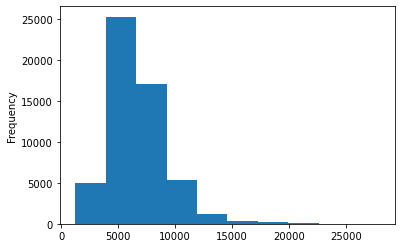

In [51]:
pd.Series(test_y_pred).plot.hist()


In [52]:
sample_submission = pd.read_csv('sample submission.csv')
sample_submission.head()

,Id,Sales
0,1,6500
1,2,6500
2,3,6500
3,4,6500
4,5,6500


In [53]:
submission = pd.DataFrame({
    'Id': future_sales['Id'],
    'Sales': test_y_pred
})
submission.head()

,Id,Sales
0,1,7611.398210
1,2,4960.503047
2,3,7194.504393
3,4,8810.785478
4,5,6048.933395


In [54]:
submission.to_csv('submissionfinalML.csv', index=False)